In [ ]:
import geopandas as gpd
from folium.plugins import Search
import pandas as pd
from folium.plugins import HeatMap
import folium

### Utilizando um shapefile com a malha que contém os municípios do Brasil selecionamos a linha que corresponde aos dados que queremos, que nesse caso é o Recife.

In [ ]:
pe = gpd.read_file("BR_Municipios_2022.shp")
pe

In [ ]:
recife = pe.loc[pe['NM_MUN'] == 'Recife']
recife = recife.dissolve(by = 'NM_MUN')
recife

,geometry,CD_MUN,SIGLA_UF,AREA_KM2
NM_MUN,,,,
Recife,"POLYGON ((-34.91800 -8.14310, -34.91814 -8.143...",2611606,PE,218.843


### Em seguida eu optei por usa um arquivo csv com latitude e longitude dos pontos e transformar em **point** que é o tipo de dados que vamos utilizar, decidi fazer dessa forma pois nem sempre vamos ter os dados que queremos em formato de shape file, assim já sabemos como transformar quando quisermos.

In [ ]:
pontos = pd.read_csv('pontos_turisticos.csv', sep = ',')
pontos

,Nome,latitude,longitude
0,Ponte da Boa Vista,-8.063553,-34.881926
1,Ponte Buarque de Macedo,-8.061843,-34.875618
2,Ponte Duarte Coelho,-8.062241,-34.881206
3,Ponte do Limoeiro,-8.050561,-34.873074
4,Ponte Maurício de Nassau,-8.063957,-34.875660
...,...,...,...
66,Paço do Frevo,-8.061318,-34.871638
67,Memorial Chico Science,-8.067122,-34.878842
68,Memorial Luiz Gonzaga,-8.067225,-34.878928
69,Museu do Trem,-8.068045,-34.883443


In [ ]:
pontos = gpd.GeoDataFrame(pontos, geometry = gpd.points_from_xy(pontos['longitude'], pontos['latitude']))
pontos

,Nome,latitude,longitude,geometry
0,Ponte da Boa Vista,-8.063553,-34.881926,POINT (-34.88193 -8.06355)
1,Ponte Buarque de Macedo,-8.061843,-34.875618,POINT (-34.87562 -8.06184)
2,Ponte Duarte Coelho,-8.062241,-34.881206,POINT (-34.88121 -8.06224)
3,Ponte do Limoeiro,-8.050561,-34.873074,POINT (-34.87307 -8.05056)
4,Ponte Maurício de Nassau,-8.063957,-34.875660,POINT (-34.87566 -8.06396)
...,...,...,...,...
66,Paço do Frevo,-8.061318,-34.871638,POINT (-34.87164 -8.06132)
67,Memorial Chico Science,-8.067122,-34.878842,POINT (-34.87884 -8.06712)
68,Memorial Luiz Gonzaga,-8.067225,-34.878928,POINT (-34.87893 -8.06722)
69,Museu do Trem,-8.068045,-34.883443,POINT (-34.88344 -8.06804)


### Aqui selecionamos somente os pontos que **pertencem** ao desenho que representa Recife

In [ ]:
pontos = pontos[pontos['geometry'].within(recife['geometry'].iloc[0])]

/usr/local/lib/python3.10/dist-packages/shapely/predicates.py:923: RuntimeWarning: invalid value encountered in within
  return lib.within(a, b, **kwargs)


<Axes: >

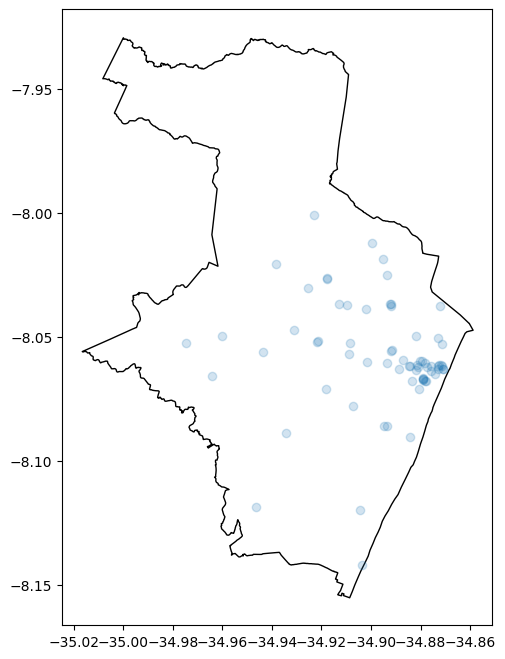

In [ ]:
base = recife.plot(color = 'white', edgecolor = 'black', figsize = (15,8))
pontos.plot(ax=base, alpha = 0.2)

### No argumento **location** colocamos manualmente as cordenadas do centro do mapa ou podemos coloca a função **dados['latitude'].mean(), dados['longitude'].mean()**.
### Os temas para os mapas podem ser vistos [aqui](https://python-visualization.github.io/folium/latest/index.html)

In [ ]:
mapa = folium.Map(location = [-8.05, -34.94],
                      zoom_start = 11,
                      tiles = 'cartodbdark_matter')
HeatMap(data= pontos[['latitude', 'longitude']], name = 'Mapa de calor').add_to(mapa)
folium.GeoJson(recife, name = 'Rio de Janeiro').add_to(mapa)

folium.LayerControl().add_to(mapa)
mapa

## Também podemos inserir informações no mapa:

In [ ]:
mapa = folium.Map(location = [-8.05, -34.94],
                      zoom_start = 11,
                      tiles = 'cartodbpositron')

folium.GeoJson(recife, name = 'Rio de Janeiro').add_to(mapa)

pontos.apply(
    lambda linha: folium.Marker(
        location = [linha['latitude'], linha['longitude']],
        popup = folium.Popup(f'''<b>Nome</b>: {linha["Nome"]}<br>
                            ''',
                             max_width= 200,
                             sticky = True)
    ).add_to(mapa), axis = 1
)

folium.LayerControl().add_to(mapa)
mapa

## Caso queira salvar o mapa como arquivo HTML basta você usar a função save()

In [ ]:

mapa.save('mapa_pontos_turisticos_recife.html')